<a href='http://moncoachdata.com'><img src= 'https://moncoachdata.com/wp-content/uploads/MonCoachData-cours/MonCoachData.jpg' width=400/></a>


---



<center><em>Pour plus d'informations, visitez notre site <a href='http://moncoachdata.com'>moncoachdata.com</a></em></center>
<center><em>et rejoignez-nous sur <a href='https://app.moncoachdata.com/discord'>Discord</a> et <a href='https://app.moncoachdata.com/youtube'>YouTube</a></em></center>



---

# Projet Capstone de Data Science

## Présentation

Si vous envisagez de sortir voir un film, dans quelle mesure pouvez-vous faire confiance aux critiques et aux évaluations en ligne ?

*Surtout* si l'entreprise affichant la note gagne *aussi* de l'argent en vendant des billets de cinéma.

Est-ce que l'entreprise a tendance à sur-évaluer les films avec de meilleures notes que celles qu'ils devraient obtenir ?

### Objectif :

**Votre objectif est d'effectuer les tâches ci-dessous en vous référant à l'article du site 538 (lien ci-dessous) et de voir si vous arrivez à la même conclusion. Vous devrez utiliser vos compétences en pandas et en data viz pour déterminer si les notes de Fandango en 2015 étaient orientées vers une meilleure évaluation/notation des films dans le but de vendre plus de billets.**

---

**Effectuez les tâches écrites en gras.**

---



## Partie 1 : Comprendre le contexte et les données


**Tâche : Lire l'article : [Be Suspicious Of Online Movie Ratings, Especially Fandango’s](http://fivethirtyeight.com/features/fandango-movies-ratings/) (si besoin traduisez le avec Google Translate, DeepL ou Fluently)**

----

**Tâche : Après avoir lu l'article, lisez ces deux tableaux donnant un aperçu des deux fichiers .csv avec lesquels nous allons travailler :**

### les données

Ce sont les données derrière l'histoire de l'article [Be Suspicious Of Online Movie Ratings, en particulier Fandango](http://fivethirtyeight.com/features/fandango-movies-ratings/) disponible publiquement sur : https://github.com/fivethirtyeight/data.

Il existe deux fichiers csv, l'un avec les Stars (étoiles) et les Ratings (notes) affichés sur Fandango, et l'autre avec des données agrégées pour les notations/évaluations de films d'autres sites, tels que Metacritic, IMDB et Rotten Tomatoes.

---

#### all_sites_scores.csv

`all_sites_scores.csv` contient tous les films qui ont une note Rotten Tomatoes, une note RT User, une note Metacritic, une note Metacritic User, une note IMDb, et au moins 30 critiques de fans sur Fandango. Les données de Fandango ont été extraites le 24 août 2015.

Column | Definition
--- | -----------
FILM | The film in question
RottenTomatoes | The Rotten Tomatoes Tomatometer score  for the film
RottenTomatoes_User | The Rotten Tomatoes user score for the film
Metacritic | The Metacritic critic score for the film
Metacritic_User | The Metacritic user score for the film
IMDB | The IMDb user score for the film
Metacritic_user_vote_count | The number of user votes the film had on Metacritic
IMDB_user_vote_count | The number of user votes the film had on IMDb

---

#### fandango_scape.csv

`fandango_scrape.csv` contient tous les films de l'article 538 tirés de Fandango.

Column | Definiton
--- | ---------
FILM | The movie
STARS | Number of stars presented on Fandango.com
RATING |  The Fandango ratingValue for the film, as pulled from the HTML of each page. This is the actual average score the movie obtained.
VOTES | number of people who had reviewed the film at the time we pulled it.

---

**Tâche : Importez toutes les bibliothèques que vous pensez utiliser :**

In [1]:
# import ici !
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Partie 2 : Exploration des scores affichés par Fandango par rapport aux évaluations des utilisateurs réels

Examinons d'abord les notes de Fandango pour voir si notre analyse est en accord avec la conclusion de l'article.

**Tâche : Exécutez la cellule ci-dessous pour lire le fichier fandango_scrape.csv**

In [2]:
# lecture du fichier fandango_scrape.csv dans le dataframe fandango
url = 'https://raw.githubusercontent.com/moncoachdata/MasterClass_DS_ML/main/fandango_scrape.csv'
fandango = pd.read_csv(url)

**Tâche : Explorez les propriétés du DataFrame et Head.**

In [3]:
fandango.head()

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


In [4]:
fandango.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    504 non-null    object 
 1   STARS   504 non-null    float64
 2   RATING  504 non-null    float64
 3   VOTES   504 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 15.9+ KB


In [5]:
fandango.describe()

,STARS,RATING,VOTES
count,504.000000,504.000000,504.000000
mean,3.558532,3.375794,1147.863095
std,1.563133,1.491223,3830.583136
min,0.000000,0.000000,0.000000
25%,3.500000,3.100000,3.000000
50%,4.000000,3.800000,18.500000
75%,4.500000,4.300000,189.750000
max,5.000000,5.000000,34846.000000


**Tâche : Explorons la relation entre la popularité d'un film et son classement. Créez un nuage de points montrant la relation entre les notes et les votes. N'hésitez pas à modifier le style visuel selon vos préférences.**

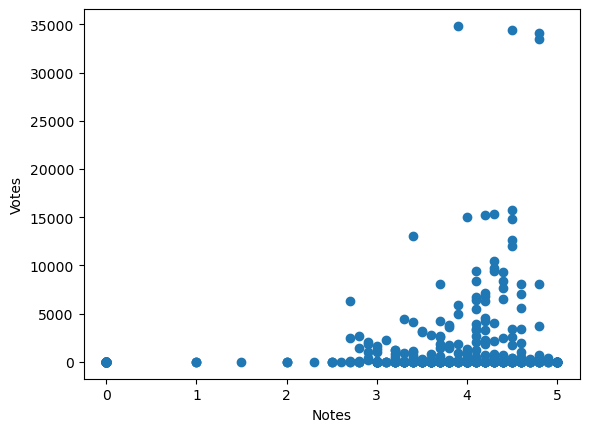

In [7]:
# code ici
x=fandango.RATING
y=fandango.VOTES
plt.scatter(x, y)# n'affiche que par points
plt.xlabel("Notes")
plt.ylabel("Votes")
plt.show()

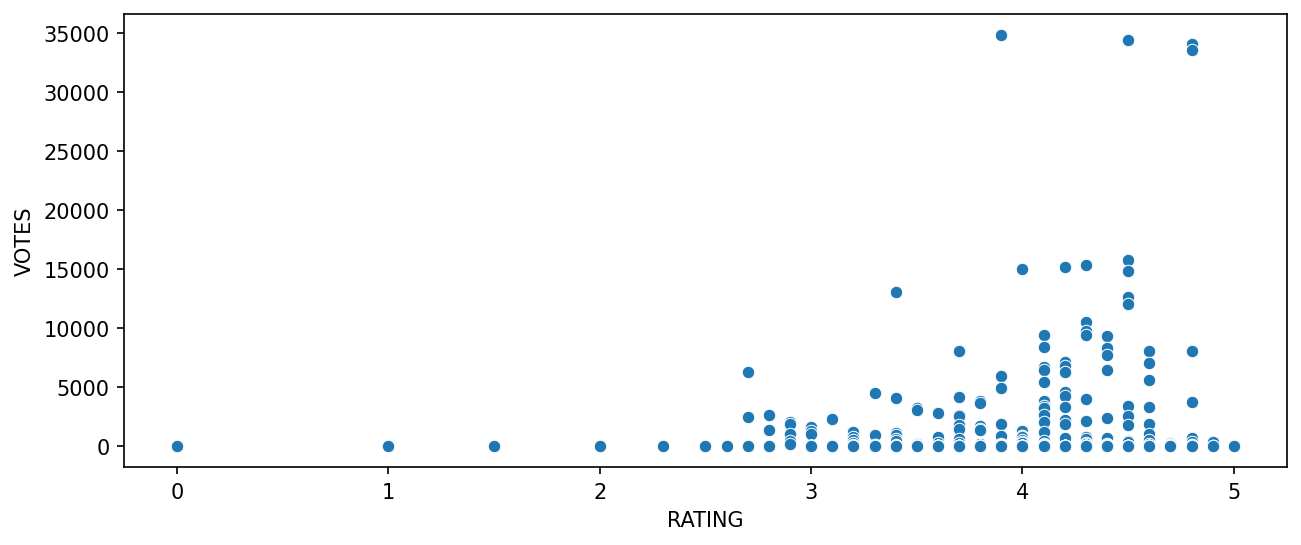

**Tâche : Calculez la corrélation entre les colonnes/features :**

In [19]:
# calcule de corrélation entre les colonnes et les features

In [8]:
fandango.corr(numeric_only=True)

,STARS,RATING,VOTES
STARS,1.000000,0.994696,0.164218
RATING,0.994696,1.000000,0.163764
VOTES,0.164218,0.163764,1.000000


**Tâche : En supposant que chaque ligne de la colonne FILM ait le même format :**

    Nom du titre du film (Année)
    
**Créez une nouvelle colonne contenant l'année de chaque film et définissez cette nouvelle colonne avec le nom YEAR**

In [9]:
# code ici
# Supposons que votre DataFrame s'appelle 'df' et que la colonne des films s'appelle 'FILM'

# Créer une nouvelle colonne 'YEAR' en extrayant l'année entre parenthèses
fandango['YEAR'] = fandango['FILM'].str.extract(r'\((\d{4})\)$')

# Convertir la colonne 'YEAR' en type numérique
fandango['YEAR'] = pd.to_numeric(fandango['YEAR'])

In [10]:
fandango.head()

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015


**Tâche : Combien de films y a-t-il par année dans le DataFrame Fandango ?**

In [22]:
# code ici
films_per_year = fandango['YEAR'].value_counts().sort_index(ascending=True)
films_per_year.head()

YEAR
1964      1
2012      1
2014     23
2015    478
2016      1
Name: count, dtype: int64

2015)    478
2014)     23
2016)      1
1964)      1
2012)      1
Name: YEAR, dtype: int64

**Tâche : Visualisez le nombre de films par an avec un graphique :**

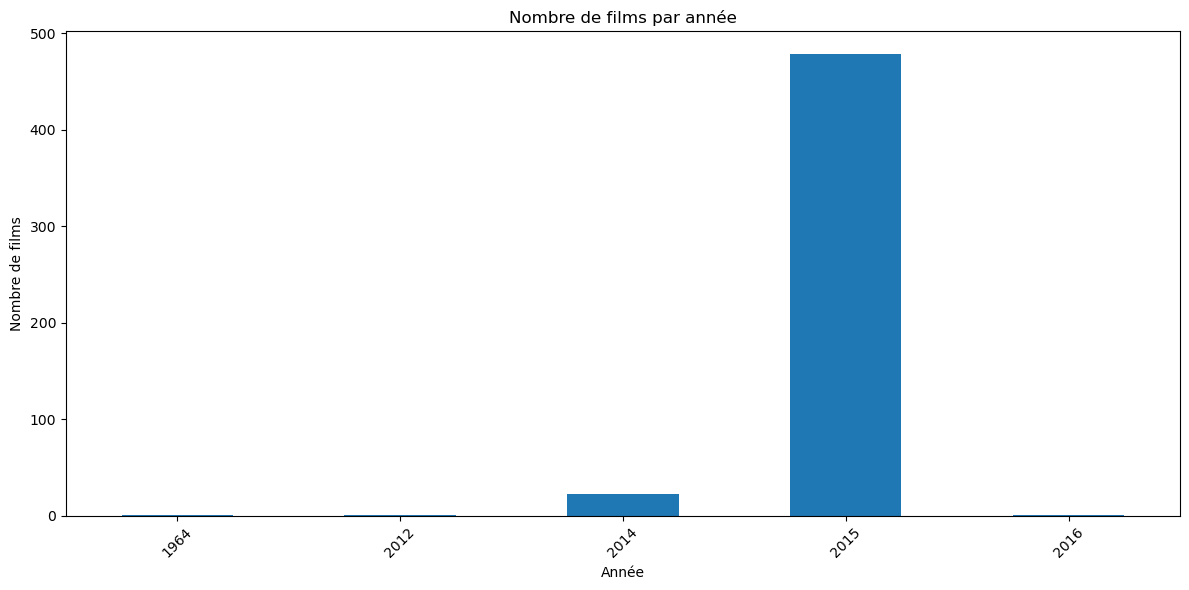

In [15]:
# code ici
# annee = fandango.groupby('YEAR').sum()

# # sort the value and get the first 10 after UK
# #annee = annee.sort_values(by = 'FILM',ascending = False)

# # create the plot
# annee['FILM'].plot(kind='bar')

# # Set the title and labels
# plt.xlabel('Année')
# plt.ylabel('Film')
# plt.title('nombre de films par an')

# # show the plot
# plt.show()
films_per_year = fandango['YEAR'].value_counts().sort_index()

# Créer le graphique
plt.figure(figsize=(12, 6))
films_per_year.plot(kind='bar')
plt.title('Nombre de films par année')
plt.xlabel('Année')
plt.ylabel('Nombre de films')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

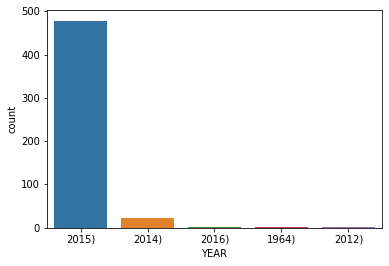

**Tâche : Quels sont les 10 films ayant obtenu le plus grand nombre de votes ?**

In [23]:
# code ici
top_10_films = fandango.sort_values('VOTES', ascending=False).head(10)

# Afficher les résultats
print(top_10_films[['FILM', 'VOTES']])

                                               FILM  VOTES
0                       Fifty Shades of Grey (2015)  34846
1                             Jurassic World (2015)  34390
2                            American Sniper (2015)  34085
3                                  Furious 7 (2015)  33538
4                                 Inside Out (2015)  15749
5  The Hobbit: The Battle of the Five Armies (2014)  15337
6               Kingsman: The Secret Service (2015)  15205
7                                    Minions (2015)  14998
8                    Avengers: Age of Ultron (2015)  14846
9                             Into the Woods (2014)  13055


,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015)
1,Jurassic World (2015),4.5,4.5,34390,2015)
2,American Sniper (2015),5.0,4.8,34085,2015)
3,Furious 7 (2015),5.0,4.8,33538,2015)
4,Inside Out (2015),4.5,4.5,15749,2015)
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014)
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015)
7,Minions (2015),4.0,4.0,14998,2015)
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015)
9,Into the Woods (2014),3.5,3.4,13055,2014)


**Tâche : Combien de films n'ont aucun avis/vote ?**

In [28]:
# code ici
compte =(fandango.VOTES==0).sum()
print(compte)

69


In [35]:
fandango.shape

(504, 5)

69

**Tâche : Créez un DataFrame avec uniquement des films évalués (en supprimant tous les films qui n'ont aucun vote).**

In [32]:
# code ici
#votes_ok =fandango.VOTES>0
votes_ok = fandango.loc[fandango.VOTES > 0, :]

In [34]:
votes_ok.shape

(435, 5)

----

**Comme indiqué dans l'article, en raison de l'affichage HTML et du classement par étoiles, la note réelle de l'utilisateur peut être légèrement différente de celle affichée à un utilisateur. Visualisons cette différence avec des distributions.**

**Tâche : Créez un diagramme KDE (ou plusieurs kdeplots) qui affiche la distribution des notes affichées (STARS) par rapport à l'évaluation réelle des votes (RATING). Limitez les KDE à 0-5.**

In [37]:
import seaborn as sns

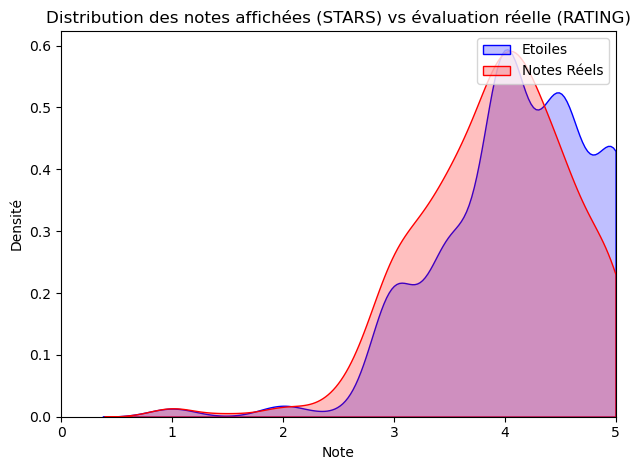

In [41]:
# code ici
# KDE pour STARS
sns.kdeplot(data=votes_ok, x='STARS', fill=True, color='blue', label='Etoiles', clip=(0, 5))

# KDE pour RATING
sns.kdeplot(data=votes_ok, x='RATING', fill=True, color='red', label='Notes Réels', clip=(0, 5))

plt.title('Distribution des notes affichées (STARS) vs évaluation réelle (RATING)')
plt.xlabel('Note')
plt.ylabel('Densité')
plt.legend()
plt.xlim(0, 5)
plt.tight_layout()
plt.show()

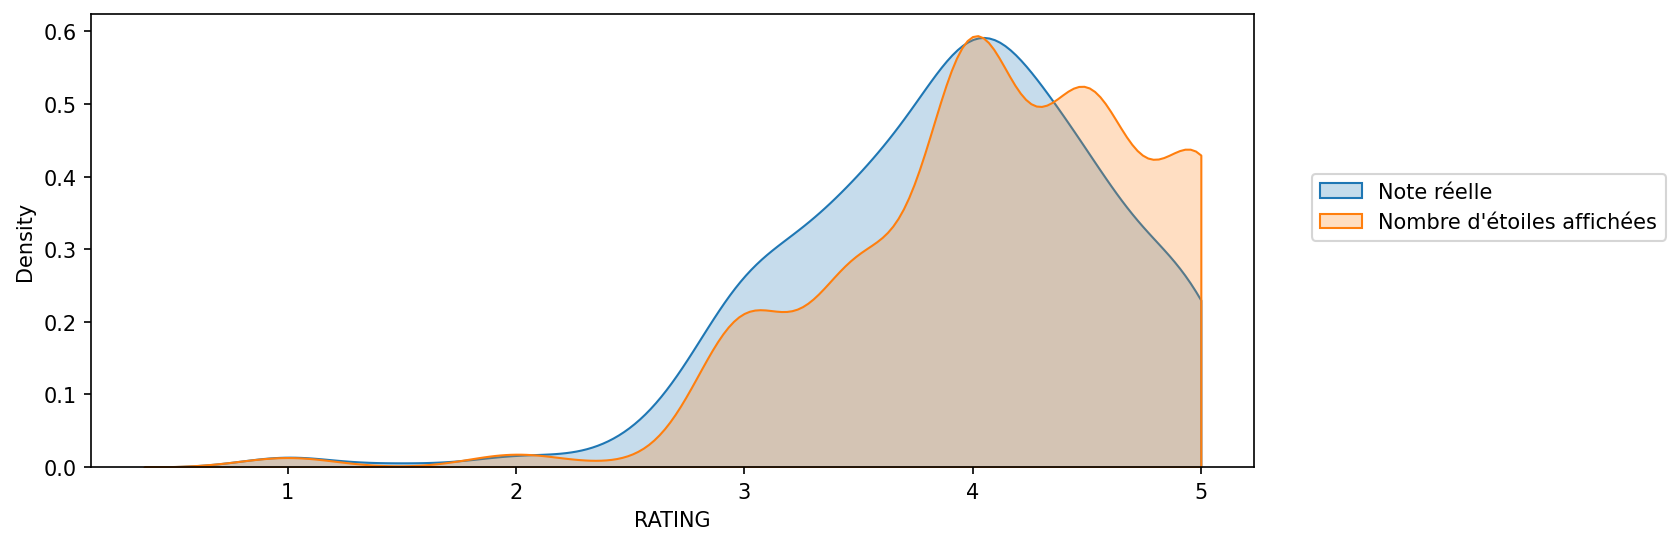

**Tâche : Quantifions maintenant cet écart. Créez une nouvelle colonne de la différence entre les étoiles affichées (STARS) et les notes réelles (RATING). Calculez cette différence avec STARS-RATING et arrondissez-la à la décimale la plus proche.**

In [47]:
# code ici
votes_ok['DIFF_VOTES']= (votes_ok['STARS'] - votes_ok['RATING']).round(1)


# Afficher les premières lignes pour vérifier
print(votes_ok[['STARS', 'RATING', 'DIFF_VOTES']].head())

   STARS  RATING  DIFF_VOTES
0    4.0     3.9         0.1
1    4.5     4.5         0.0
2    5.0     4.8         0.2
3    5.0     4.8         0.2
4    4.5     4.5         0.0


C:\Users\f.renaux\AppData\Local\Temp\ipykernel_16700\2656141075.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  votes_ok['DIFF_VOTES']= (votes_ok['STARS'] - votes_ok['RATING']).round(1)


In [49]:
votes_ok.head(20)

,FILM,STARS,RATING,VOTES,YEAR,DIFF_VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0
2,American Sniper (2015),5.0,4.8,34085,2015,0.2
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2
4,Inside Out (2015),4.5,4.5,15749,2015,0.0
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014,0.2
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015,0.3
7,Minions (2015),4.0,4.0,14998,2015,0.0
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015,0.5
9,Into the Woods (2014),3.5,3.4,13055,2014,0.1


,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015),0.1
1,Jurassic World (2015),4.5,4.5,34390,2015),0.0
2,American Sniper (2015),5.0,4.8,34085,2015),0.2
3,Furious 7 (2015),5.0,4.8,33538,2015),0.2
4,Inside Out (2015),4.5,4.5,15749,2015),0.0
...,...,...,...,...,...,...
430,That Sugar Film (2015),5.0,5.0,1,2015),0.0
431,The Intern (2015),5.0,5.0,1,2015),0.0
432,The Park Bench (2015),5.0,5.0,1,2015),0.0
433,The Wanted 18 (2015),5.0,5.0,1,2015),0.0


**Tâche : Créez un diagramme de comptage (countplot) pour afficher le nombre de fois qu'une certaine différence se produit.**

C:\Users\f.renaux\AppData\Local\Temp\ipykernel_16700\3156478534.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(votes_ok,x="DIFF_VOTES",palette='pastel')


<Axes: xlabel='DIFF_VOTES', ylabel='count'>

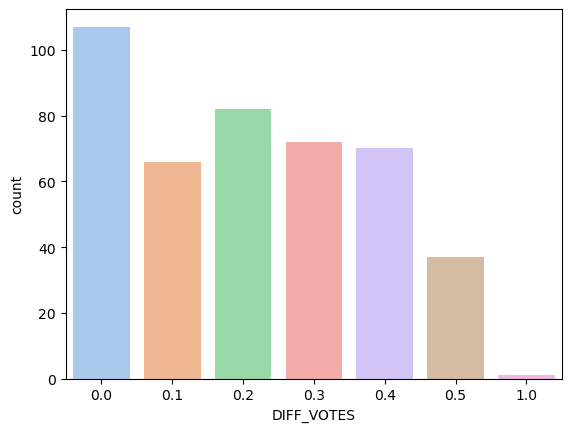

In [54]:
# code ici
#sns.color_palette("pastel")
sns.countplot(votes_ok,x="DIFF_VOTES",palette='pastel')

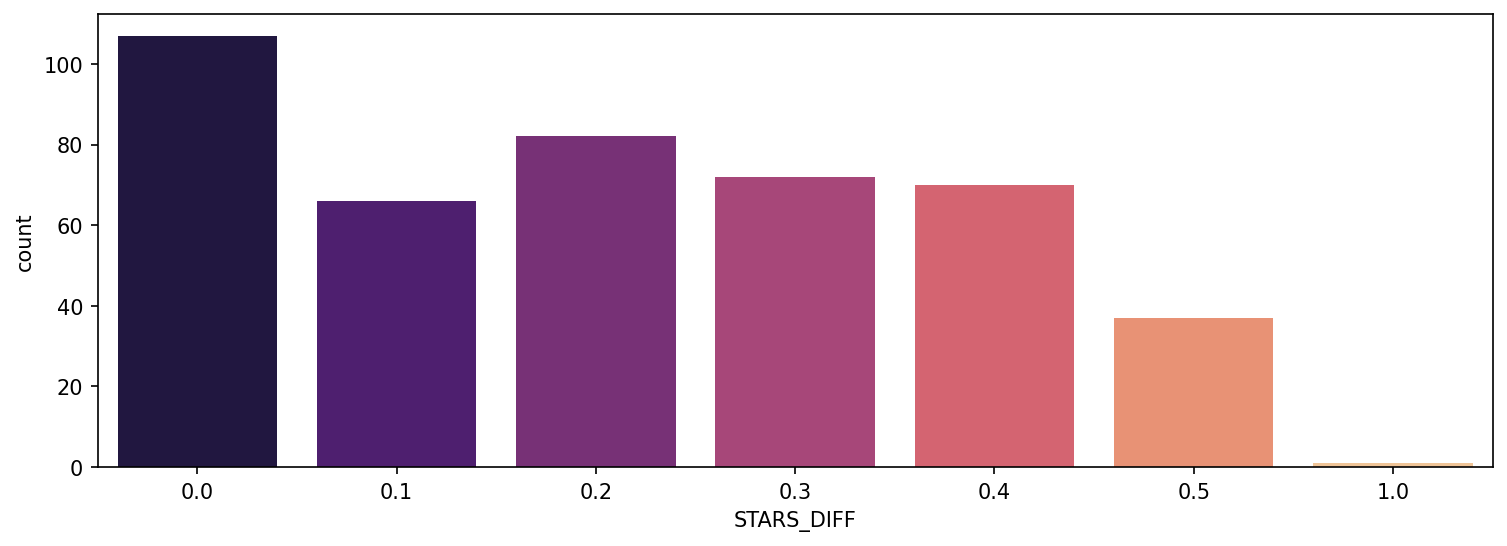

**Tâche : Nous pouvons voir sur le diagramme précédent qu'un film affichait une différence d'une étoile par rapport à sa véritable note ! Quel film a eu ce différentiel proche d'une étoile ?**

In [55]:
# code ici
film_one = votes_ok.loc[votes_ok.DIFF_VOTES >= 1,:]
#votes_ok = fandango.loc[fandango.VOTES > 0, :]  pour exemple
film_one.head()

,FILM,STARS,RATING,VOTES,YEAR,DIFF_VOTES
381,Turbo Kid (2015),5.0,4.0,2,2015,1.0


,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
381,Turbo Kid (2015),5.0,4.0,2,2015),1.0


## Partie 3 : Comparaison des évaluations de Fandango avec d'autres plateformes

Comparons maintenant les scores de Fandango à d'autres sites d'évaluation de films et voyons comment ils se comparent.


**Tâche : Lisez le fichier "all_sites_scores.csv" en exécutant la cellule ci-dessous**

In [56]:
 # Lecture du fichier all_sites_scores.csv dans le dataframe all_sites
url = 'https://raw.githubusercontent.com/moncoachdata/MasterClass_DS_ML/main/all_sites_scores.csv'
all_sites = pd.read_csv(url)

**Tâche : Explorez les colonnes du DataFrame, ses informations, sa description statistiques.**

In [57]:
all_sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560


In [58]:
all_sites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Metacritic_user_vote_count  146 non-null    int64  
 7   IMDB_user_vote_count        146 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 9.3+ KB


In [59]:
all_sites.describe()

,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,60.849315,63.876712,58.808219,6.519178,6.736986,185.705479,42846.205479
std,30.168799,20.024430,19.517389,1.510712,0.958736,316.606515,67406.509171
min,5.000000,20.000000,13.000000,2.400000,4.000000,4.000000,243.000000
25%,31.250000,50.000000,43.500000,5.700000,6.300000,33.250000,5627.000000
50%,63.500000,66.500000,59.000000,6.850000,6.900000,72.500000,19103.000000
75%,89.000000,81.000000,75.000000,7.500000,7.400000,168.500000,45185.750000
max,100.000000,94.000000,94.000000,9.600000,8.600000,2375.000000,334164.000000


### Rotten Tomatoes

Jetons d'abord un coup d'œil à Rotten Tomatoes. RT a deux séries de critiques, leurs critiques (évaluations publiées par les critiques officielles) et les avis des utilisateurs.

**Tâche : Créez un nuage de points explorant la relation entre les avis des critiques RT et les avis des utilisateurs RT.**

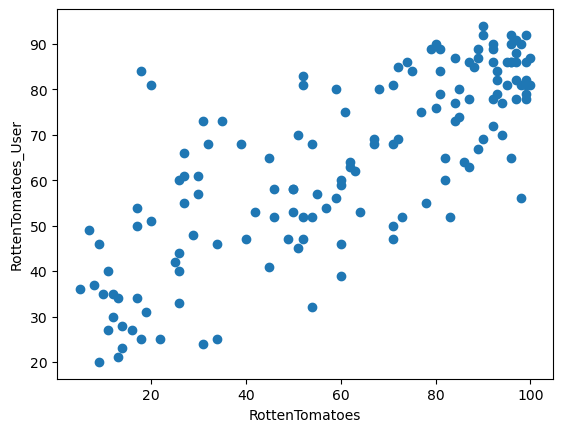

In [61]:
# code ici
x=all_sites.RottenTomatoes
y=all_sites.RottenTomatoes_User
plt.scatter(x, y)# n'affiche que par points
plt.xlabel("RottenTomatoes")
plt.ylabel("RottenTomatoes_User")
plt.show()

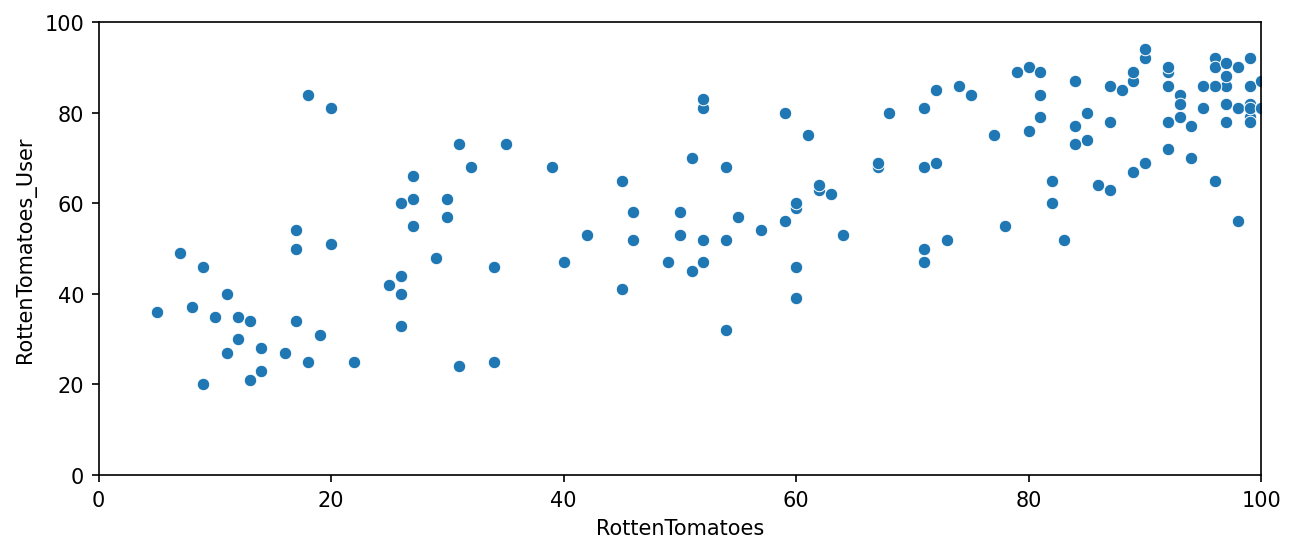

Quantifions cette différence en comparant les notes des critiques et celles des utilisateurs RT. Nous allons calculer cela avec RottenTomatoes-RottenTomatoes_User.

Remarque : Rotten_Diff est ici RottenTomatoes (notes des critiques de RT) - RottenTomatoes_User (notes des utilisateurs de RT). Les valeurs proches de 0 signifient donc un accord entre les critiques et les utilisateurs. Des valeurs positives plus élevées signifient que les critiques ont obtenu une note beaucoup plus élevée que les utilisateurs. Des valeurs négatives plus élevées signifient que les utilisateurs ont obtenu une note beaucoup plus élevée que les critiques


**Tâche : Créez une nouvelle colonne basée sur la différence entre les notes des critiques et les notes des utilisateurs pour Rotten Tomatoes. Calculez ceci avec RottenTomatoes-RottenTomatoes_User**

In [62]:
# code ici
all_sites['Rotten_Diff'] = (all_sites['RottenTomatoes'] - all_sites['RottenTomatoes_User']).round(1)
# votes_ok['DIFF_VOTES']= (votes_ok['STARS'] - votes_ok['RATING']).round(1)
all_sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107,-12
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709,5
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660,-10
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136,-66
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560,-14


Comparons maintenant la différence moyenne globale. Puisque nous avons affaire à des différences qui peuvent être négatives ou positives, prenez d'abord la valeur absolue de toutes les différences, puis prenez la moyenne. Cela retournera la moyenne des valeurs absolues de la différence entre la note des critiques et la note des utilisateurs.

**Tâche : Calculez la différence absolue moyenne entre les notes RT et les notes des utilisateurs RT comme décrit ci-dessus.**

In [63]:
# code ici
Moyenne_values = all_sites.Rotten_Diff.abs().mean()
print(Moyenne_values)

15.095890410958905


15.095890410958905

**Tâche : Tracez la distribution des différences entre la note des critiques RT et la note des utilisateurs RT. Ce diagramme de distribution doit comporter des valeurs négatives. N'hésitez pas à utiliser une courbe KDE ou un histogramme pour afficher cette distribution.**

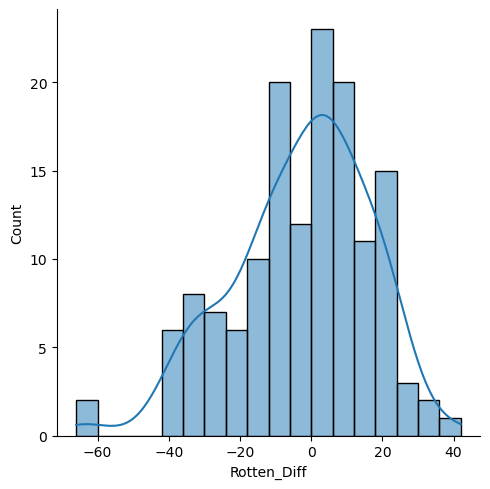

In [72]:
# code ici
sns.displot(all_sites, x="Rotten_Diff", binwidth=6,kde=True)

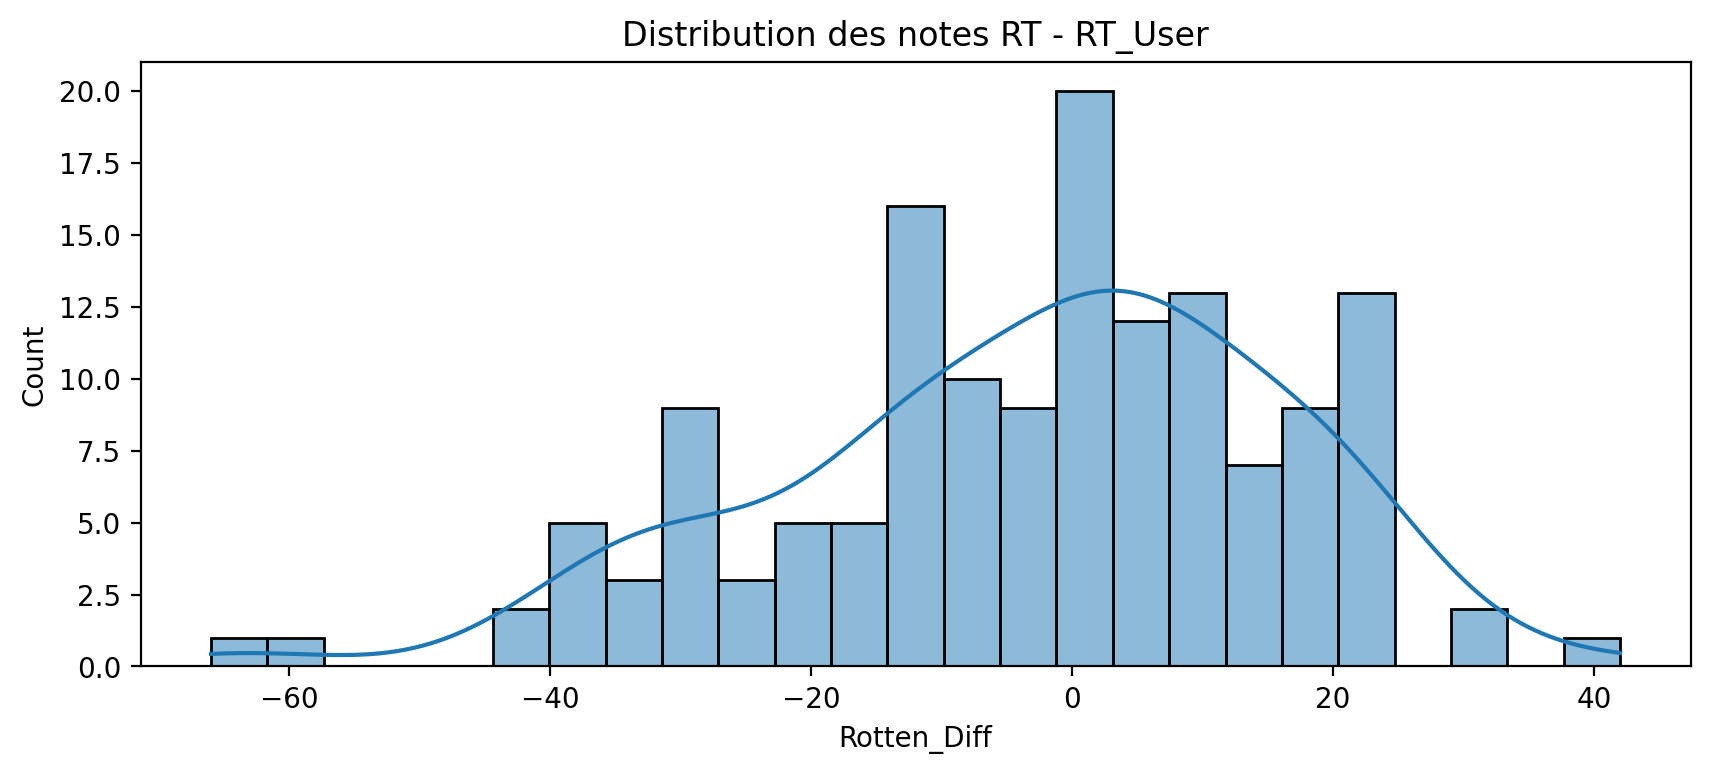

**Tâche : Créez maintenant une distribution montrant la *valeur absolue* de la différence des notes entre les critiques et les utilisateurs sur Rotten Tomatoes.**

In [90]:
# code ici
#all_sites['Rotten_Diff'] = (all_sites['RottenTomatoes'] - all_sites['RottenTomatoes_User']).round(1)
# Calculer la valeur absolue de la différence
all_sites['ABS_DIFF'] = (all_sites['RottenTomatoes'] - all_sites['RottenTomatoes_User']).abs()

# Créer un histogramme des différences
#hist_data = all_sites['ABS_DIFF'].value_counts().sort_index().reset_index()
#hist_data.columns = ['difference', 'count']

# Convertir en format JSON pour l'utiliser dans le composant React
#data = hist_data.to_dict('records')

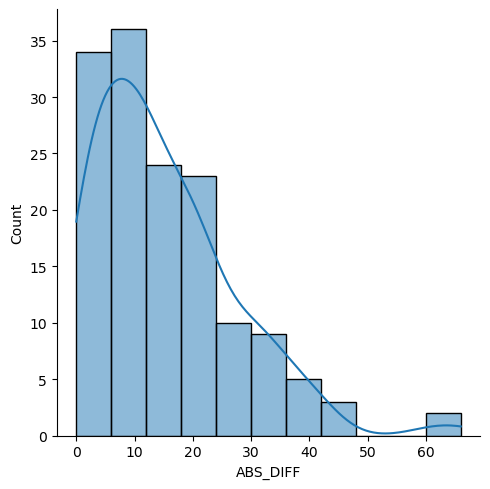

In [91]:
sns.displot(all_sites, x="ABS_DIFF", binwidth=6,kde=True)

**Voyons quels films sont à l'origine des différences les plus importantes. Tout d'abord, montrez les 5 meilleurs films présentant la plus grande différence *négative* entre les utilisateurs et les critiques de RT. Puisque nous avons calculé la différence en tant que (Notes des Critiques - Notes des Utilisateurs), les grandes valeurs négatives impliquent que les utilisateurs ont évalué le film beaucoup plus haut en moyenne que les critiques.**

**Tâche : Quels sont le top 5 des films qui ont obtenu une note moyenne des utilisateurs supérieure à celle des critiques :**

In [92]:
all_sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff,ABS_DIFF
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107,-12,12
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709,5,5
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660,-10,10
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136,-66,66
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560,-14,14


In [93]:
# code ici
top_5_films = all_sites.sort_values('Rotten_Diff', ascending=True).head(5)

In [94]:
top_5_films.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff,ABS_DIFF
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136,-66,66
85,Little Boy (2015),20,81,30,5.9,7.4,38,5927,-61,61
134,The Longest Ride (2015),31,73,33,4.8,7.2,49,25214,-42,42
105,Hitman: Agent 47 (2015),7,49,28,3.3,5.9,67,4260,-42,42
125,The Wedding Ringer (2015),27,66,35,3.3,6.7,126,37292,-39,39


**Tâche : Affichez maintenant le top 5 des films qui ont obtenu une note moyenne des critiques supérieure à celle des utilisateurs.**

In [112]:
all_sites ['all_moyenne'] = (all_sites['RottenTomatoes'] > all_sites['RottenTomatoes_User'])
all_sites.head(10)

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff,ABS_DIFF,all_moyenne
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107,-12,12,False
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709,5,5,True
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660,-10,10,False
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136,-66,66,False
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560,-14,14,False
5,The Water Diviner (2015),63,62,50,6.8,7.2,34,39373,1,1,True
6,Irrational Man (2015),42,53,53,7.6,6.9,17,2680,-11,11,False
7,Top Five (2014),86,64,81,6.8,6.5,124,16876,22,22,True
8,Shaun the Sheep Movie (2015),99,82,81,8.8,7.4,62,12227,17,17,True
9,Love & Mercy (2015),89,87,80,8.5,7.8,54,5367,2,2,True


In [113]:
# top_5_films_moyenne = all_sites.sort_values('Rotten_Diff', ascending=False & 'all_moyenne'=='True').head(5)
top_5_films_moyenne = all_sites[all_sites['all_moyenne'] == True].sort_values('Rotten_Diff', ascending=False).head(5)

In [123]:
top_5_films_moyenne.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff,ABS_DIFF,all_moyenne
69,Mr. Turner (2014),98,56,94,6.6,6.9,98,13296,42,42,True
112,It Follows (2015),96,65,83,7.5,6.9,551,64656,31,31,True
115,While We're Young (2015),83,52,76,6.7,6.4,65,17647,31,31,True
145,"Kumiko, The Treasure Hunter (2015)",87,63,68,6.4,6.7,19,5289,24,24,True
40,I'll See You In My Dreams (2015),94,70,75,6.9,6.9,14,1151,24,24,True


Les critiques adorent, mais les utilisateurs détestent


,FILM,Rotten_Diff
69,Mr. Turner (2014),42
112,It Follows (2015),31
115,While We're Young (2015),31
37,Welcome to Me (2015),24
40,I'll See You In My Dreams (2015),24


### MetaCritic

Regardons maintenant les notes de MetaCritic. MetaCritic affiche également une note moyenne des utilisateurs par rapport à leur note officielle affichée.

**Tâche : Créez un nuage de points de la note MetaCritic par rapport à la note Metacritic des utilisateurs.**

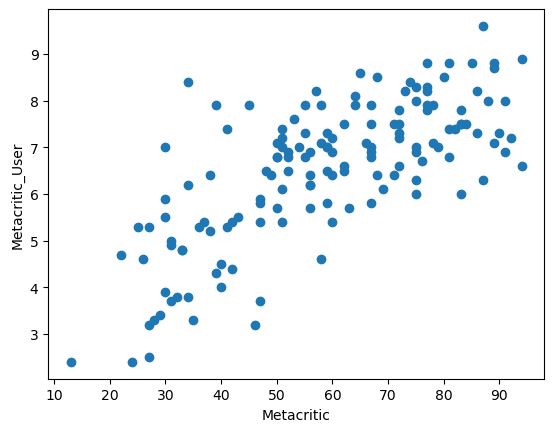

In [116]:
# code ici
x=all_sites.Metacritic
y=all_sites.Metacritic_User
plt.scatter(x, y)# n'affiche que par points
plt.xlabel("Metacritic")
plt.ylabel("Metacritic_User")
plt.show()

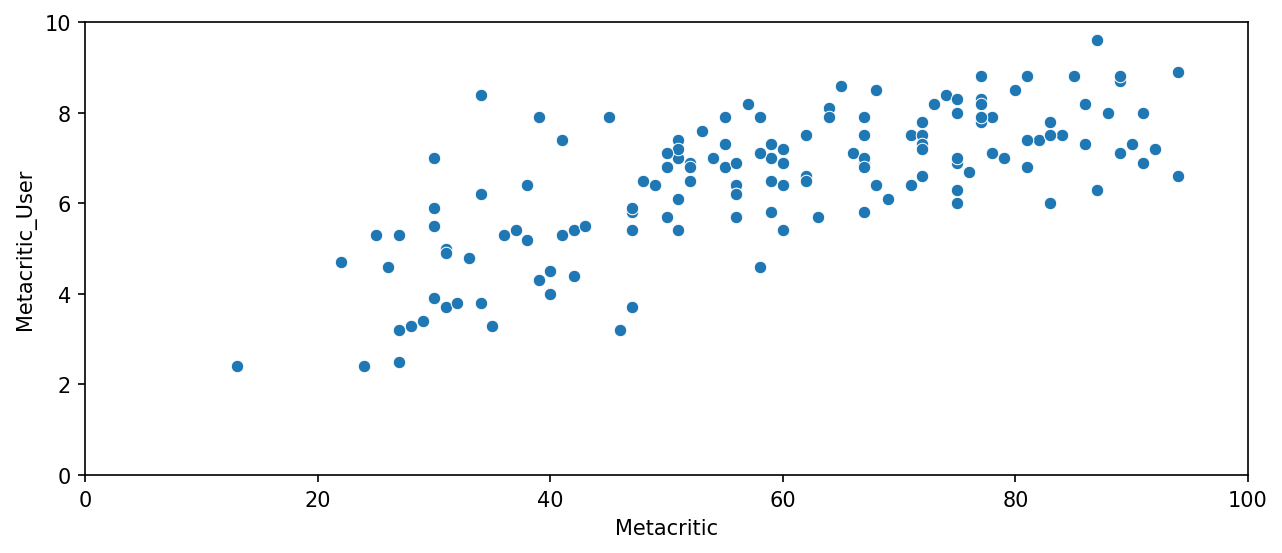

### IMDb

Enfin, explorons IMDb. Notez que Metacritic et IMDb offrent le nombre de votes. Analysons les films les plus populaires.


**Tâche : Créez un nuage de points montrant la relation entre le nombre de votes sur MetaCritic et le nombre de votes sur IMDb.**

Metacritic_user_vote_count	IMDB_user_vote_count

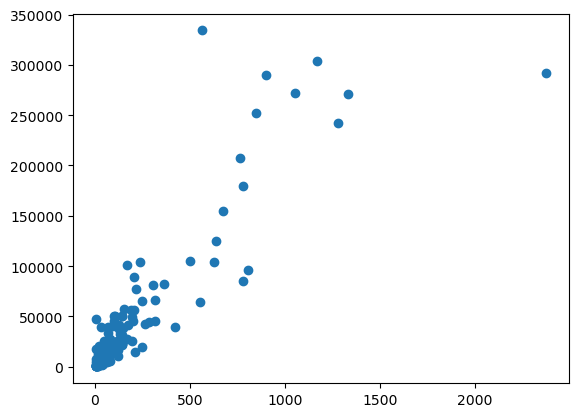

In [117]:
x=all_sites.Metacritic_user_vote_count	
y=all_sites.IMDB_user_vote_count
plt.scatter(x,y)
plt.xlabel='metacritic'
plt.ylabel='imdb'
plt.show()

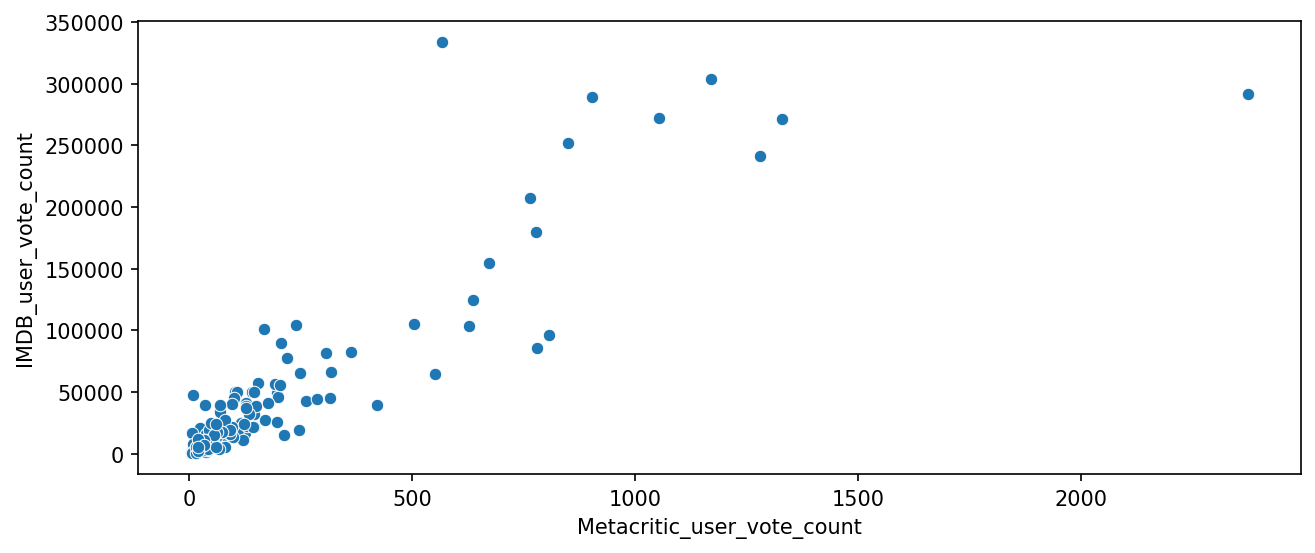

**Notez qu'il y a deux valeurs aberrantes (outliers) ici. Le film ayant obtenu le plus grand nombre de votes sur IMDb n'a qu'environ 500 notes MetaCritic. Quel est ce film ?**

**Tâche : Quel film a le plus grand nombre de votes des utilisateurs IMDd ?**

In [121]:
# code ici
grand_vote =(all_sites['IMDB_user_vote_count']).max()
print(grand_vote)
film_g_vote = all_sites[all_sites['IMDB_user_vote_count'] == grand_vote].sort_values('Rotten_Diff')

334164


In [122]:
film_g_vote.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff,ABS_DIFF,all_moyenne
14,The Imitation Game (2014),90,92,73,8.2,8.1,566,334164,-2,2,False


,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
14,The Imitation Game (2014),90,92,73,8.2,8.1,566,334164,-2


**Tâche : Quel film a le plus grand nombre de votes des utilisateurs MetaCritic ?**

In [124]:
# code ici
result_meta = (all_sites['Metacritic_user_vote_count']).max()
print(result_meta)

2375


In [125]:
film_g_meta = all_sites[all_sites['Metacritic_user_vote_count'] == result_meta].sort_values('Rotten_Diff')
film_g_meta.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff,ABS_DIFF,all_moyenne
88,Mad Max: Fury Road (2015),97,88,89,8.7,8.3,2375,292023,9,9,True


,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
88,Mad Max: Fury Road (2015),97,88,89,8.7,8.3,2375,292023,9


### Notes Fandago vs. Autres Plateformes

Pour finir, commençons à examiner si Fandango affiche artificiellement des notes supérieures aux autres sites de critiques de film pour augmenter les ventes de billets.

**Tâche : Combinez la table Fandango avec la table all_sites. Tous les films de la table Fandango ne sont pas dans la table all_sites, car certains films de Fandango ont très peu ou pas de critiques. Nous voulons uniquement comparer les films qui se trouvent dans les deux DataFrames, donc effectuez une fusion *inner* pour fusionner les deux DataFrames en fonction des colonnes FILM.**

In [126]:
# code ici

fuqion_film = pd.merge(fandango, all_sites, on='FILM', how='inner')

print(fuqion_film.head())
print(fuqion_film.info())
print(f"Nombre de lignes dans Fandango : {len(fandango)}")
print(f"Nombre de lignes dans all_sites : {len(all_sites)}")
print(f"Nombre de lignes après la fusion : {len(fuqion_film)}")

                          FILM  STARS  RATING  VOTES  YEAR  RottenTomatoes  \
0  Fifty Shades of Grey (2015)    4.0     3.9  34846  2015              25   
1        Jurassic World (2015)    4.5     4.5  34390  2015              71   
2       American Sniper (2015)    5.0     4.8  34085  2015              72   
3             Furious 7 (2015)    5.0     4.8  33538  2015              81   
4            Inside Out (2015)    4.5     4.5  15749  2015              98   

   RottenTomatoes_User  Metacritic  Metacritic_User  IMDB  \
0                   42          46              3.2   4.2   
1                   81          59              7.0   7.3   
2                   85          72              6.6   7.4   
3                   84          67              6.8   7.4   
4                   90          94              8.9   8.6   

   Metacritic_user_vote_count  IMDB_user_vote_count  Rotten_Diff  ABS_DIFF  \
0                         778                179506          -17        17   
1       

In [127]:
fuqion_film.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        145 non-null    object 
 1   STARS                       145 non-null    float64
 2   RATING                      145 non-null    float64
 3   VOTES                       145 non-null    int64  
 4   YEAR                        145 non-null    int64  
 5   RottenTomatoes              145 non-null    int64  
 6   RottenTomatoes_User         145 non-null    int64  
 7   Metacritic                  145 non-null    int64  
 8   Metacritic_User             145 non-null    float64
 9   IMDB                        145 non-null    float64
 10  Metacritic_user_vote_count  145 non-null    int64  
 11  IMDB_user_vote_count        145 non-null    int64  
 12  Rotten_Diff                 145 non-null    int64  
 13  ABS_DIFF                    145 non

In [128]:
fuqion_film.head()

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff,ABS_DIFF,all_moyenne
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,25,42,46,3.2,4.2,778,179506,-17,17,False
1,Jurassic World (2015),4.5,4.5,34390,2015,71,81,59,7.0,7.3,1281,241807,-10,10,False
2,American Sniper (2015),5.0,4.8,34085,2015,72,85,72,6.6,7.4,850,251856,-13,13,False
3,Furious 7 (2015),5.0,4.8,33538,2015,81,84,67,6.8,7.4,764,207211,-3,3,False
4,Inside Out (2015),4.5,4.5,15749,2015,98,90,94,8.9,8.6,807,96252,8,8,True


<class 'pandas.core.frame.DataFrame'>
Int64Index: 145 entries, 0 to 144
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        145 non-null    object 
 1   STARS                       145 non-null    float64
 2   RATING                      145 non-null    float64
 3   VOTES                       145 non-null    int64  
 4   YEAR                        145 non-null    object 
 5   RottenTomatoes              145 non-null    int64  
 6   RottenTomatoes_User         145 non-null    int64  
 7   Metacritic                  145 non-null    int64  
 8   Metacritic_User             145 non-null    float64
 9   IMDB                        145 non-null    float64
 10  Metacritic_user_vote_count  145 non-null    int64  
 11  IMDB_user_vote_count        145 non-null    int64  
 12  Rotten_Diff                 145 non-null    int64  
dtypes: float64(4), int64(7), object(2)


,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015),25,42,46,3.2,4.2,778,179506,-17
1,Jurassic World (2015),4.5,4.5,34390,2015),71,81,59,7.0,7.3,1281,241807,-10
2,American Sniper (2015),5.0,4.8,34085,2015),72,85,72,6.6,7.4,850,251856,-13
3,Furious 7 (2015),5.0,4.8,33538,2015),81,84,67,6.8,7.4,764,207211,-3
4,Inside Out (2015),4.5,4.5,15749,2015),98,90,94,8.9,8.6,807,96252,8


### Normalisation des colonnes comme celles de STARS et RATINGS de Fandango sur l'échelle 0-5

Notez que RT, MetaCritic et IMDb n'utilisent pas un score (note) compris entre 0 et 5 étoiles comme le fait Fandango. Pour faire une comparaison équitable, nous devons *normaliser* ces valeurs afin qu'elles se situent toutes entre 0 et 5 étoiles et que la relation entre les avis reste la même.

**Tâche : Créez de nouvelles colonnes normalisées pour toutes les notes afin qu'elles correspondent à la plage de 0 à 5 étoiles affichée sur Fandango. Il existe de nombreuses façons de procéder.**

Lien indice : https://stackoverflow.com/questions/26414913/normalize-columns-of-pandas-data-frame


Astuce plus facile, gardez à l'esprit qu'il s'agit d'un moyen simple de convertir les notes :
* 100/20 = 5
* 10/2 = 5

In [ ]:
# code ici faire les 5 colonnes (RottenTomatoes="RT_Norm"/20),(RottenTomatoes_User="RTU_Norm"/20),(Metacritic="Meta_Norm"/20), (Metacritic_User ="Meta_U_Norm"/2),(IMDB ="IMDB_Norm"/2)

In [134]:
fuqion_film['RT_Norm'] = (fuqion_film['RottenTomatoes'] / 20).round(1)
#pour arrondir à la valeur iférieure round(1)
#fuqion_film['RT_Norm'] = np.floor(fuqion_film['RottenTomatoes'] / 20 * 10) / 10    


In [135]:
# code ici faire les 5 colonnes (RottenTomatoes="RT_Norm"/20),(RottenTomatoes_User="RTU_Norm"/20),(Metacritic="Meta_Norm"/20), (Metacritic_User ="Meta_U_Norm"/2),(IMDB ="IMDB_Norm"/2)
fuqion_film['RTU_Norm'] = (fuqion_film['RottenTomatoes_User'] / 20).round(1)

In [136]:
fuqion_film['Meta_Norm'] = (fuqion_film['Metacritic'] / 20).round(1)

In [137]:
fuqion_film['Meta_U_Norm'] = (fuqion_film['Metacritic_User'] / 2).round(1)

In [138]:
fuqion_film['IMDB_Norm'] = (fuqion_film['IMDB'] / 2).round(1)

In [139]:
fuqion_film.head(5)

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff,ABS_DIFF,all_moyenne,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,25,42,46,3.2,4.2,778,179506,-17,17,False,1.2,2.1,2.3,1.6,2.1
1,Jurassic World (2015),4.5,4.5,34390,2015,71,81,59,7.0,7.3,1281,241807,-10,10,False,3.6,4.0,3.0,3.5,3.6
2,American Sniper (2015),5.0,4.8,34085,2015,72,85,72,6.6,7.4,850,251856,-13,13,False,3.6,4.2,3.6,3.3,3.7
3,Furious 7 (2015),5.0,4.8,33538,2015,81,84,67,6.8,7.4,764,207211,-3,3,False,4.0,4.2,3.4,3.4,3.7
4,Inside Out (2015),4.5,4.5,15749,2015,98,90,94,8.9,8.6,807,96252,8,8,True,4.9,4.5,4.7,4.4,4.3


,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015),25,42,46,3.2,4.2,778,179506,-17,1.2,2.1,2.3,1.6,2.1
1,Jurassic World (2015),4.5,4.5,34390,2015),71,81,59,7.0,7.3,1281,241807,-10,3.6,4.0,3.0,3.5,3.6
2,American Sniper (2015),5.0,4.8,34085,2015),72,85,72,6.6,7.4,850,251856,-13,3.6,4.2,3.6,3.3,3.7
3,Furious 7 (2015),5.0,4.8,33538,2015),81,84,67,6.8,7.4,764,207211,-3,4.0,4.2,3.4,3.4,3.7
4,Inside Out (2015),4.5,4.5,15749,2015),98,90,94,8.9,8.6,807,96252,8,4.9,4.5,4.7,4.4,4.3


**Tâche : Créez maintenant un DataFrame norm_scores qui ne contient que les notes normalisées. Incluez à la fois STARS et RATING de la table Fandango d'origine.**

In [140]:
# code ici
#   RT_Norm	 RTU_Norm	Meta_Norm	Meta_U_Norm	IMDB_Norm
norm_scores = pd.DataFrame({
    'Stars': fuqion_film['STARS'],
    'Rating': fuqion_film['RATING'],
    'RT_Norm': fuqion_film['RT_Norm'],
    'RTU_Norm': fuqion_film['RTU_Norm'],
    'Meta_Norm': fuqion_film['Meta_Norm'],
    'Meta_U_Norm': fuqion_film['Meta_U_Norm'],
    'IMDB_Norm': fuqion_film['IMDB_Norm'] 
})

In [141]:
norm_scores.head()

,Stars,Rating,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm
0,4.0,3.9,1.2,2.1,2.3,1.6,2.1
1,4.5,4.5,3.6,4.0,3.0,3.5,3.6
2,5.0,4.8,3.6,4.2,3.6,3.3,3.7
3,5.0,4.8,4.0,4.2,3.4,3.4,3.7
4,4.5,4.5,4.9,4.5,4.7,4.4,4.3


,STARS,RATING,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm
0,4.0,3.9,1.2,2.1,2.3,1.6,2.1
1,4.5,4.5,3.6,4.0,3.0,3.5,3.6
2,5.0,4.8,3.6,4.2,3.6,3.3,3.7
3,5.0,4.8,4.0,4.2,3.4,3.4,3.7
4,4.5,4.5,4.9,4.5,4.7,4.4,4.3


### Comparaison de la distribution des notes entre les sites


Maintenant, c'est le moment de vérité ! Est-ce que Fandango affiche des notes anormalement élevées ? Nous savons déjà que Fandango affiche une note STARS sous forme d'étoiles plus haute que la note réelle RATING, mais les notes elles-mêmes sont-elles supérieures à la moyenne de toutes les plateformes d'évaluations et critiques de films ?


**Tâche : Créez un diagramme comparant les distributions des notes normalisées sur tous les sites. Il existe de nombreuses façons de le faire, mais explorez la documentation Seaborn KdePlot pour trouver des moyens simples de le montrer rapidement. Ne vous inquiétez pas si le format de votre tracé n'est pas exactement le même que le nôtre, tant que les différences de distribution sont claires.**

Note rapide si vous rencontrez des problèmes pour déplacer la légende d'un kdeplot Seaborn : https://github.com/mwaskom/seaborn/issues/2280

<Axes: ylabel='Density'>

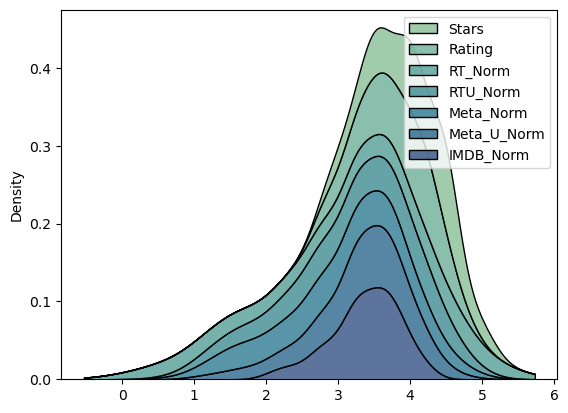

In [146]:
# code ici
sns.kdeplot(data=norm_scores ,multiple="stack", palette="crest")

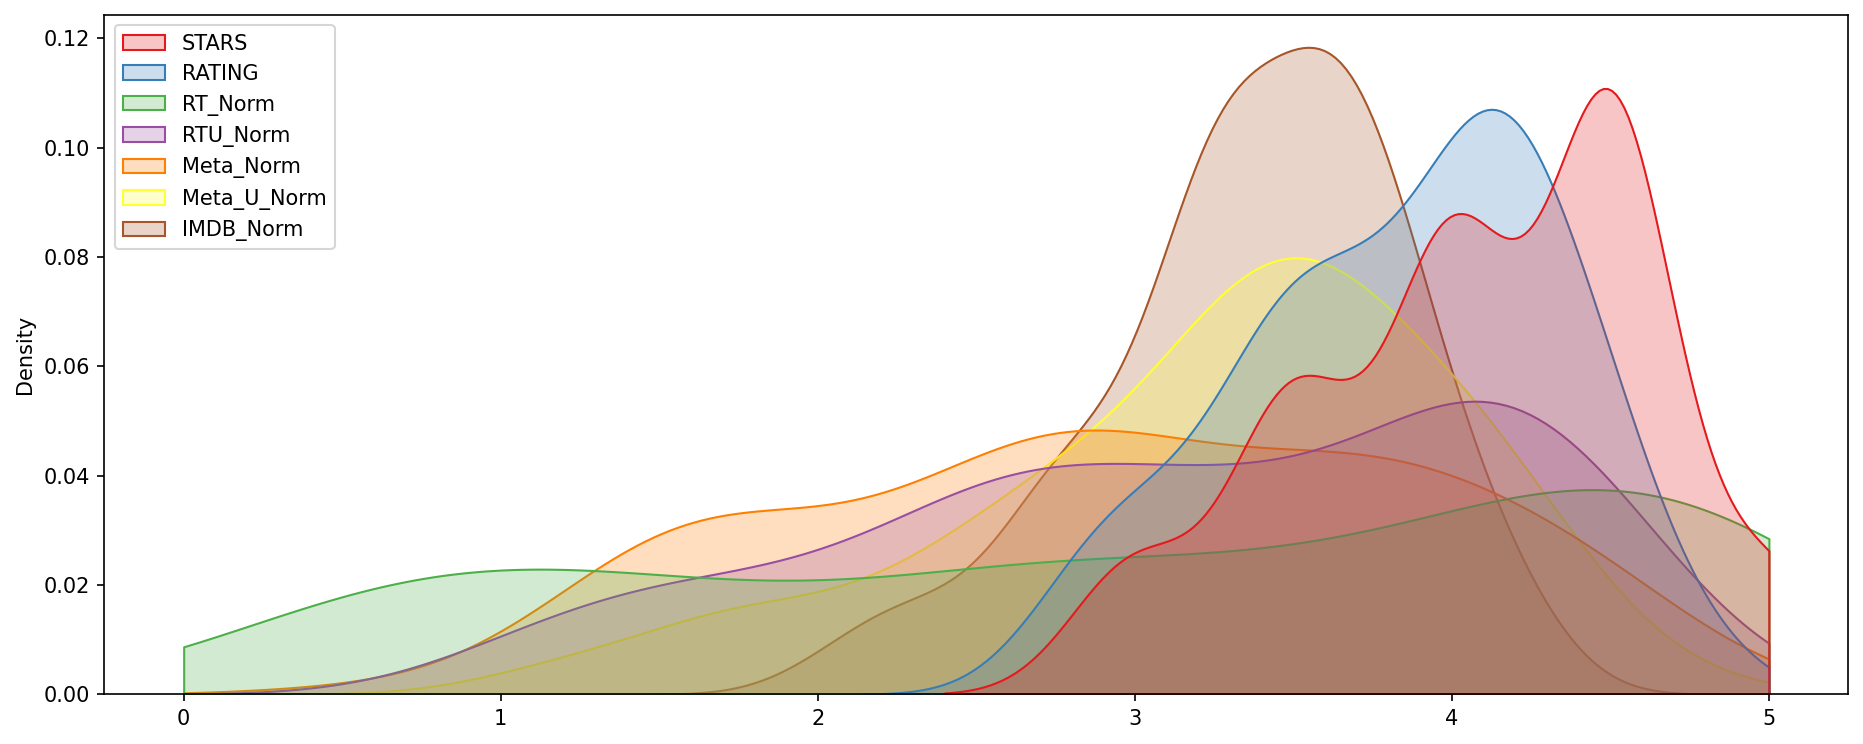

**Il est clair que la distribution de Fandango est inégale. Nous pouvons également constater que les critiques de RT ont la distribution la plus uniforme. Comparons directement ces deux-là.**

**Tâche : Créez un diagramme KDE qui compare la distribution des notes des critiques RT avec les STARS affichées par Fandango.**

<Axes: xlabel='Stars', ylabel='Density'>

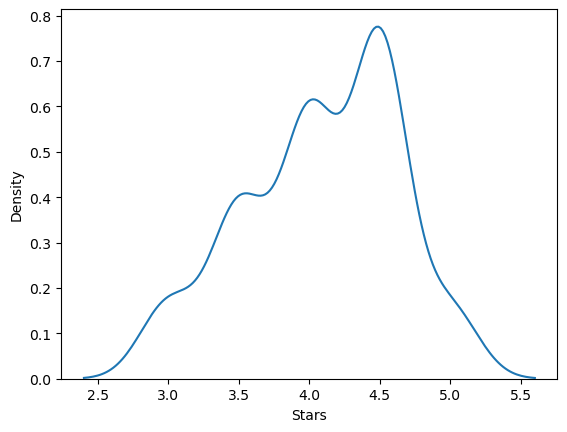

In [147]:
# code ici
sns.kdeplot(data=norm_scores,  x=norm_scores.Stars)

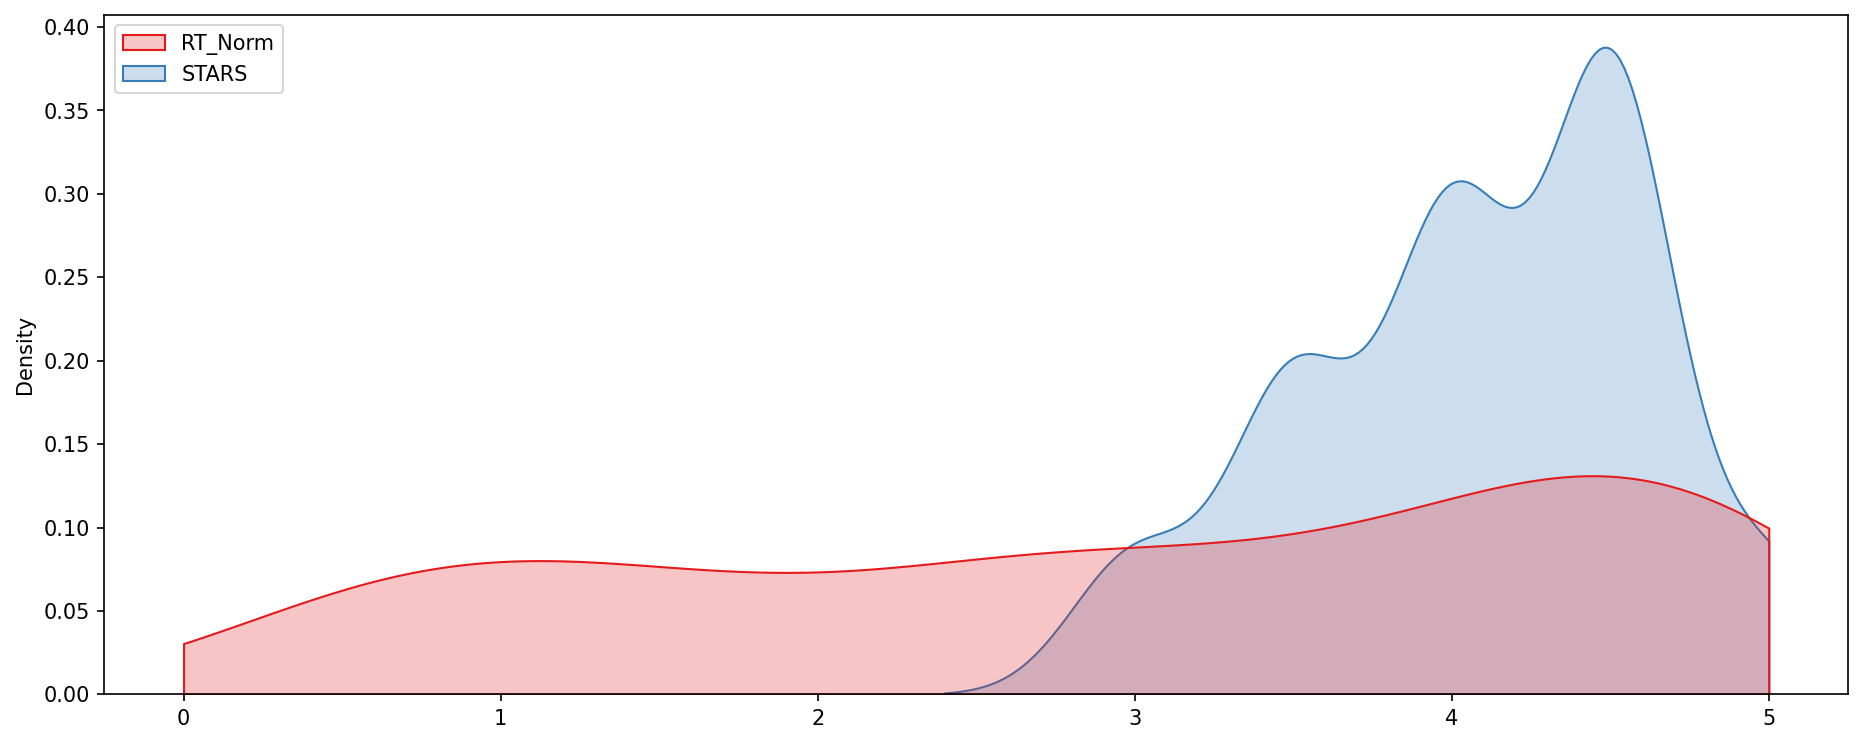

**Tâche facultative : Créez un histogramme comparant toutes les notes normalisées.**

In [ ]:
# code ici

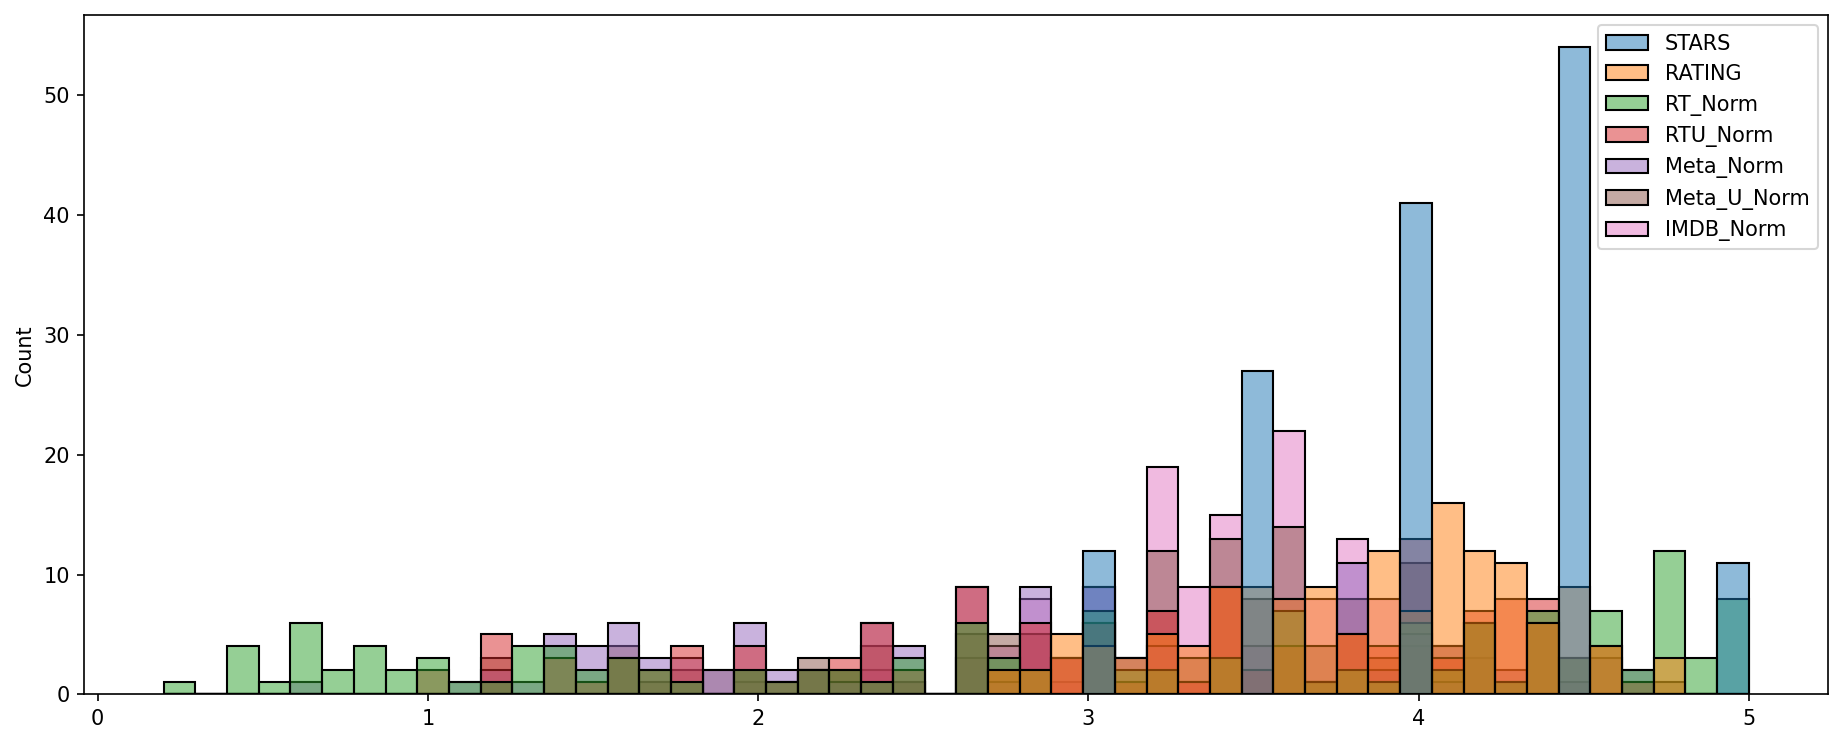

### Comment sont évalués les pires films sur toutes les plateformes ?

**Tâche : Créez une visualisation de clustermap de toutes les notes normalisées. Notez les différences de notation, les films les mieux notés doivent être regroupés par rapport aux films mal notés.**

**Remarque : Ce clustermap n'a pas besoin d'avoir les titres de FILM en tant qu'index, n'hésitez pas à le supprimer pour le clustermap.**

In [ ]:
# code ici

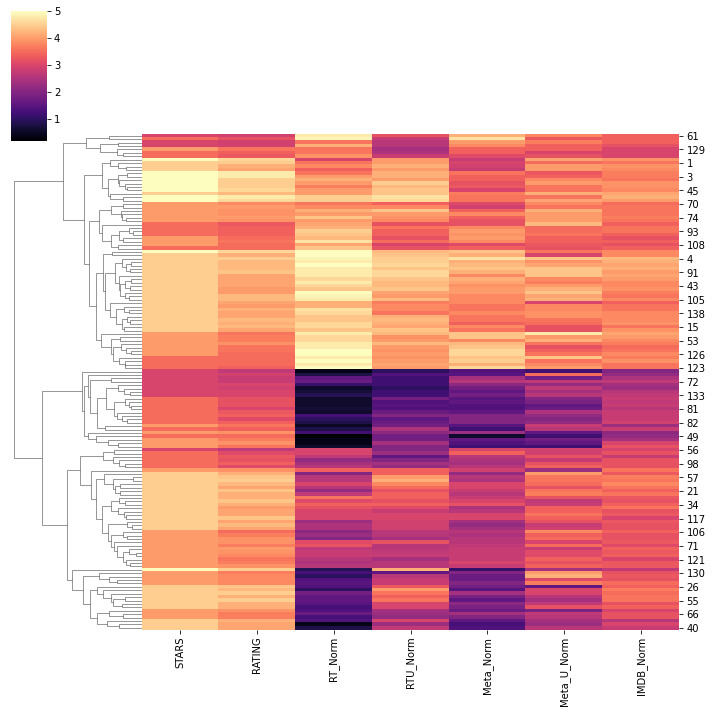

**Tâche : Il est clair que Fandango note les films de façon beaucoup plus généreuse que les autres plateformes, surtout si l'on considère qu'il affiche alors une version arrondie de sa note. Examinons le top 10 des pires films. Sur la base des évaluations des critiques de Rotten Tomatoes, quels sont les 10 films les moins bien notés ? Quels sont les scores normalisés sur toutes les plateformes pour ces films ? Vous devrez peut-être ajouter la colonne FILM à votre DataFrame de scores (notes) normalisés pour voir les résultats.**

In [ ]:
# code ici

,STARS,RATING,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm,FILM
49,3.5,3.5,0.2,1.8,0.6,1.2,2.2,Paul Blart: Mall Cop 2 (2015)
25,4.5,4.1,0.4,2.3,1.3,2.3,3.0,Taken 3 (2015)
28,3.0,2.7,0.4,1.0,1.4,1.2,2.0,Fantastic Four (2015)
54,4.0,3.7,0.4,1.8,1.6,1.8,2.4,Hot Pursuit (2015)
84,4.0,3.9,0.4,2.4,1.4,1.6,3.0,Hitman: Agent 47 (2015)
50,4.0,3.6,0.5,1.8,1.5,2.8,2.3,The Boy Next Door (2015)
77,3.5,3.2,0.6,1.8,1.5,2.0,2.8,Seventh Son (2015)
78,3.5,3.2,0.6,1.5,1.4,1.6,2.8,Mortdecai (2015)
83,3.5,3.3,0.6,1.7,1.6,2.5,2.8,Sinister 2 (2015)
87,3.5,3.2,0.6,1.4,1.6,1.9,2.7,Unfinished Business (2015)


**Tâche finale : Visualisez la distribution des notes sur toutes les plateformes pour les 10 films les plus mal notés par les critiques de RT.**

In [ ]:
# code ici

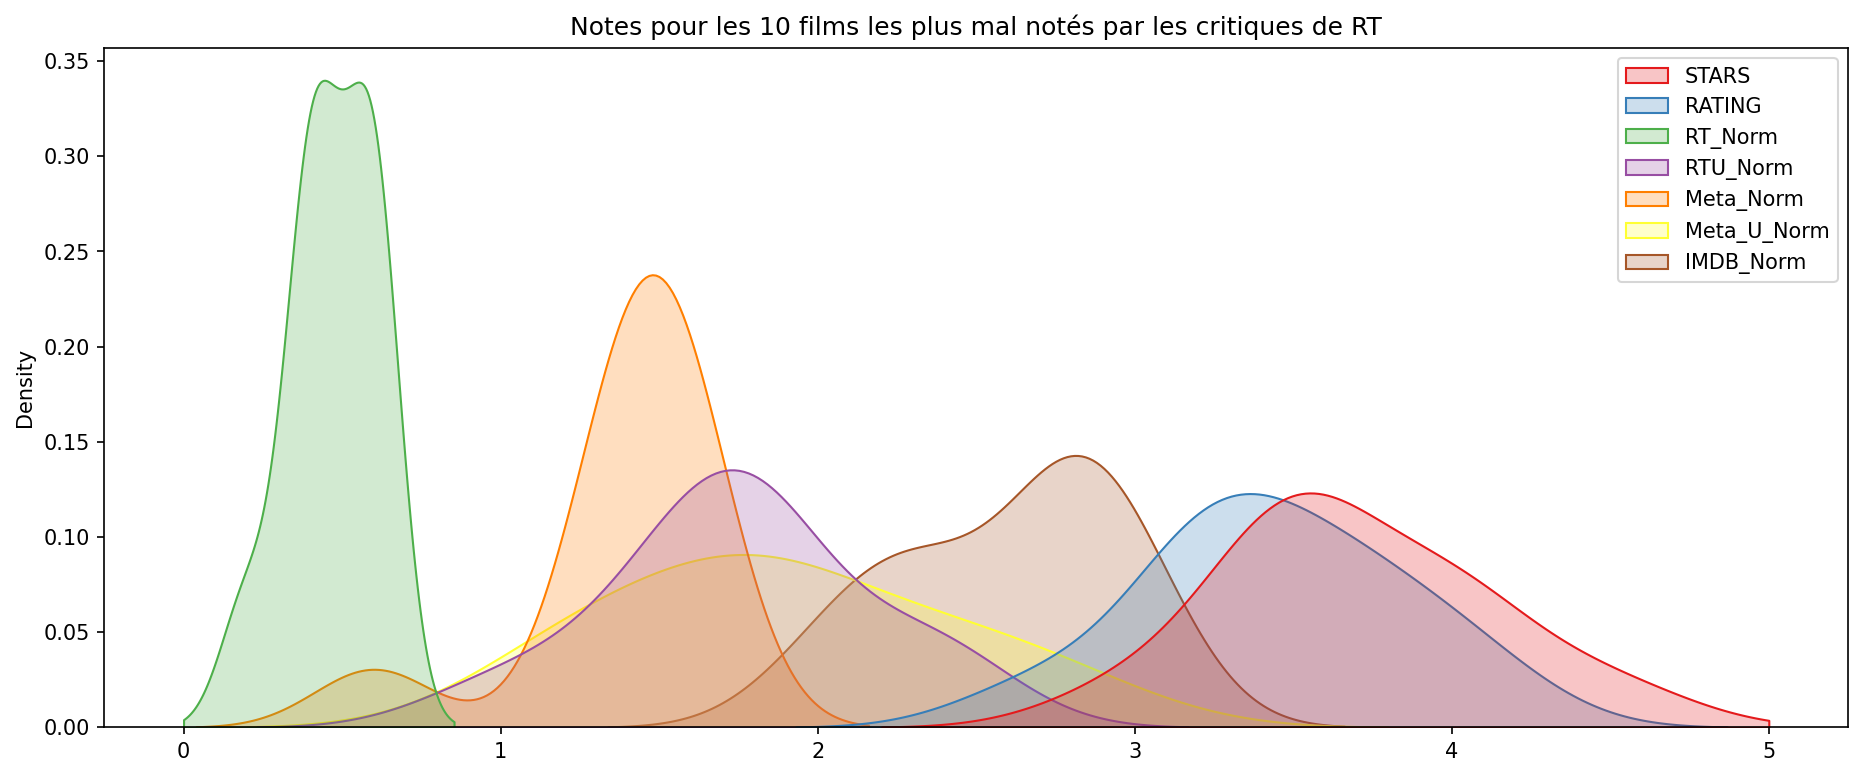

---
---
<img src="https://upload.wikimedia.org/wikipedia/en/6/6f/Taken_3_poster.jpg">

**Réflexions finales : Wow ! Fandango affiche environ 3 à 4 étoiles pour des films clairement mauvais ! Remarquez le plus grand escroc : [Taken 3 !](https://www.youtube.com/watch?v=tJrfImRCHJ0). Fandango affiche 4,5 étoiles sur son site pour un film avec une [note moyenne de 1,86](https://en.wikipedia.org/wiki/Taken_3#Critical_response) sur les autres plateformes !**

STARS                     4.5
RATING                    4.1
RT_Norm                   0.4
RTU_Norm                  2.3
Meta_Norm                 1.3
Meta_U_Norm               2.3
IMDB_Norm                   3
FILM           Taken 3 (2015)
Name: 25, dtype: object

In [ ]:
0.4+2.3+1.3+2.3+3

9.3

In [ ]:
9.3/5

1.86

**Bon courage !**